<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_46_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 46: Logisitic Regression- Sigmoid Functon



In today's class, you will learn to classify or predict whether a person is suffering from heart disease or not based on just cholesterol values by deploying two most commonly used classification-based machine learning algorithms:

1. Random Forest Classifier
2. Logistic Regression

Before we start, let's first recall the attributes or columns of the dataset.

**Data Description**

The Heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Columns|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type (4 values)|
|trestbps|resting blood pressure (in mm Hg on admission to the hospital)|
|chol|serum cholesterol in $\frac{mg}{dl}$|
|fbs|fasting blood sugar > 120 $\frac{mg}{dl}$|
|restecg|resting electrocardiographic results (values 0, 1, 2)|
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no)|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment|
|ca|number of major vessels (0-3) colored by fluoroscopy|
|thal|A blood disorder called thalassemia|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease




---

#### Activity 1: Loading Data



In [ ]:
#  Import the required modules and load the heart disease dataset. Also, display the first five rows.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = '/content/heart.csv'
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's first look at the complete information on the `df` DataFrame.

In [ ]:
# Apply the 'info()' function on the 'df' DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


You can see there are 303 entries for each column and no missing values.


---

In [ ]:
df["target"].value_counts()

,count
target,
1,165
0,138


#### Activity 2: Imbalanced Data

The target variable `target` has two values: `0` and `1`. This means that our dataset is composed of two classes or labels:

 - Class `0` - Patients NOT having heart disease
 - Class `1` - Patients having heart disease

Such problems are known as **binary classification** problem where the target attribute can have only two possible values (for e.g. `0` and `1`).

Before we start building the model, let us find out whether our dataset is balanced or not i.e. whether class distribution is uniform among all the classes. An imbalanced dataset means that the number of observations belonging to one class is significantly lower than that of the other class. Such datasets will result in a biased classifier which will hamper the results.

As our dataset has two classes, then balanced data would mean 50% observations for each class. Let us calculate the number of observations for each class.

In [ ]:
# Print the number of records in each label and their percentage in the 'target' column
# Print the number of records with and without heart disease
print("Number of records in each label are")
print(df['target'].value_counts())

# Print the percentage of each label
print("\nPercentage of records in each label are")
print(df['target'].value_counts() * 100 / df.shape[0])

Number of records in each label are
target
1    165
0    138
Name: count, dtype: int64

Percentage of records in each label are
target
1    54.455446
0    45.544554
Name: count, dtype: float64


You can observe that the number of observations for each class is approximately 54% and 46% which does not seems one-sided. This means that our dataset is not imbalanced or biased towards one class or label.

Let us classify the patients using Random Forest Classifier and evaluate the prediction model.

---

In [ ]:
#chol column - feature - independent feature
#target - target - dependent
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Activity 3: Train-Test Split

We will first predict whether a person is a heart patient or not by analysing only his/her cholesterol value. Thus, the model will use only one feature or independent variable `chol` to predict the target variable `target`.

Before deploying our model, let's split the `df` DataFrame into train set and test set.

In [ ]:
#  Split the DataFrame into the train and test sets.

from sklearn.model_selection import train_test_split

X = df['chol']   # DataFrame consisting of only one feature (univariate)
y = df['target'] # DataFrame containing the target variable

# Split the DataFrame into the train and test sets such that test set has 30% of the values.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# Reshape to 1-dimensional array.
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)




---

#### Activity 4: Applying Random Forest Classifier

We had already explored the **Random Forest Classifier** algorithm in one of our previous classes. Let's use it to find out if it can detect the patients having heart disease accurately or not.

In [ ]:
# Build the Random Forest Classifier prediction model.
# Import the required modules from the 'sklearn.ensemble' and 'sklearn.metrics' libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Build the model.
rf_clf = RandomForestClassifier(n_jobs = -1)


# Call the 'fit()' function.
rf_clf.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the model.
rf_clf.score(X_train, y_train)

0.8537735849056604

You may observe that the model score is pretty close to 1 or 100%. Let's perform predictions using the above model.

In [ ]:
#  Make predictions on the test dataset using the 'predict()' function.
rf_y_pred = rf_clf.predict(X_test)
rf_y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1])

Let's compute the confusion matrix to evaluate the accuracy of our classifier `rf_clf`.

In [ ]:
#  Display the results of 'confusion_matrix'
confusion_matrix(y_test, rf_y_pred)

array([[23, 18],
       [22, 28]])

So we got the confusion matrix for our Random Forest model. Let's recall what does a confusion matrix returns as output.

In this case,
 - positive outcome $\Rightarrow$ class `1` (patients having heart disease)
 - negative outcome $\Rightarrow$ class `0` (patients NOT having heart disease)

The confusion matrix reflects the following values:

1. **True Negatives (TN)** - class `0` values **correctly** predicted as class `0`.

2. **True Positives (TP)** - class `1` values **correctly** predicted as class `1`.

3. **False Positives (FP)** - class `0` values **incorrectly**  predicted as class `1`.

4. **False Negatives (FN)** - class `1` values **incorrectly**  predicted as class `0`.


||Predicted Class `0`|Predicted Class `1`|    
|-|-|-|
|Actual Class `0`|**TN = 24**|**FP = 17**|
|Actual Class `1`|**FN = 20**|**TP = 30**|


**Note:** Every time you build a prediction model, the predictions might be slightly different from the previous ones. Hence, the confusion matrix might have slightly different values every time.

These values of confusion matrix are used for calculating precision, recall and f1-score with the below formulae:

1. **Precision** - It is the ratio of the correctly predicted positive values (TP) to the total predicted positive values (TP + FP) i.e.

$$\text{precision} = \frac{\text{TP}}{\text{TP + FP}}$$


2. **Recall** -  It is the ratio of the correctly predicted positive values (TP)values to the total values (TP + FN) i.e.

$$\text{recall} = \frac{\text{TP}}{\text{TP + FN}}$$


3. **f1-score** - It is a harmonic mean of the precision and recall values, i.e.

$$\text{f1-score} = 2 \left( \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} \right)$$

Let's take a look at precision, recall and f1-score of our model using `classification_report()` function.

In [ ]:
#  Display the precision, recall and f1-score values.
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.51      0.56      0.53        41
           1       0.61      0.56      0.58        50

    accuracy                           0.56        91
   macro avg       0.56      0.56      0.56        91
weighted avg       0.56      0.56      0.56        91



We can see that the **f1-scores** for both the labels `0` and `1` are not closed to 1. Thus, the prediction percentage is not satisfactory.  

Let's verify accuracy with another classification based machine learning model **Logistic Regression**.

-----

#### Activity 5: Logistic Regression

Logistic Regression is a type of **classification** algorithm which classifies or categorises a given set of data into different class labels. In the context of heart disease dataset, logistic regression will  classify the patients either as `1` (having heart disease) or as `0` (not having heart disease).

Logistic Regression is used to predict the probability of an outcome for an event. It calculates a threshold probability value. If the probability of an outcome is less than the threshold probability, then logistic regression classifies that outcome as `0`, otherwise as `1`. You will learn the technical details in the subsequent classes, but for the time being, let's build a Logistic Regression model on the train set by following the steps listed below:

1. Import `LogisticRegression` class from the `sklearn.linear_model` module.
2. Create an object of the `LogisticRegression` class, say `log_reg` and pass `n_jobs = -1` as input to its constructor.
3. Call the `fit()` function of the `LogisticRegression` class on the object created and pass `X_train` and `y_train` as inputs to the function.

In [ ]:
#  Deploy the 'LogisticRegression' model using the 'fit()' function.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs = -1)

log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)

0.5283018867924528

The accuracy score is less than the one obtained through `RandomForestClassifier` . However, let's make the predictions on the test set and compare them with the actual labels.

In [ ]:
# Make predictions on the test dataset by using the 'predict()' function.
log_y_pred = log_reg.predict(X_test)
log_y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

Let's compute the confusion matrix to calculate recall, precision and f1-scores
to evaluate the logistic regression model.

In [ ]:
#  Display the results of 'confusion_matrix'
confusion_matrix(y_test, rf_y_pred)

array([[23, 18],
       [22, 28]])

In [ ]:
# Display the confusion_matrix.
confusion_matrix(y_test, log_y_pred)

array([[ 2, 39],
       [ 0, 50]])

In [ ]:
#  Display recall, precision and f1-score values.
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        41
           1       0.56      1.00      0.72        50

    accuracy                           0.57        91
   macro avg       0.78      0.52      0.41        91
weighted avg       0.76      0.57      0.44        91



The f1-score is high for class `1` which are true positives are correctly obtained through Logistic Regression. But true negatives are very low. The Random Forest Classifier model is able to get more true negatives. So both of them are unable to provide high number of true positive and high number of true negatives.

You will soon get to learn how both these models work behind the scenes and then you will develop a sense of which classification model to use for different kinds of problem statements.

Let us predict the labels with both classifiers on some arbitrary cholesterol values, say 180 and 260.

In [ ]:
#  Predict labels with cholesterol levels 180 and 260 for both models
# Using Random Forest Classifier
print(f"Prediction of Random Forest Classification with cholesterol = 180: {rf_clf.predict(np.array(180).reshape(-1, 1))}")
print(f"Prediction of Random Forest Classification with cholesterol = 260: {rf_clf.predict(np.array(260).reshape(-1, 1))}")

# Using Logistic Regression
print(f"\nPrediction of Logistic Regression Classification with cholesterol = 180: {log_reg.predict(np.array(180).reshape(-1, 1))}")
print(f"Prediction of Logistic Regression Classification with cholesterol = 260: {log_reg.predict(np.array(260).reshape(-1, 1))}")

Prediction of Random Forest Classification with cholesterol = 180: [1]
Prediction of Random Forest Classification with cholesterol = 260: [0]

Prediction of Logistic Regression Classification with cholesterol = 180: [1]
Prediction of Logistic Regression Classification with cholesterol = 260: [1]


#### Activity 6: Sigmoid Function

The sigmoid function, in maths, classifies any data point between **0** and **1**. The graph of a sigmoid function follows the shape of English letter **S**. Mathematically, the sigmoid function is given as

$$y =  \frac{1}{1 + e^{-x}}$$

where,  

- $y$ is the output of the sigmoid function

- $x$ is an independent variable

- $e$ is Euler's constant

The $x$ takes all the values between $- \infty$ to $\infty$ i.e., $x \in (-\infty, \infty)$ and the $y$ ranges between $0$ to $1$ i.e., $y \in (0, 1)$.

**Q: What is so great about sigmoid function in machine learning?**

The sigmoid function in the context of machine learning returns the probability of occurrence of an event. As you know, the probability of an event ranges between 0 and 1. So does the output of the sigmoid function. Hence, usage of sigmoid function to calculate probabilities to classify outcomes (say 0 and 1) seems like a natural fit.

Before we go deep into the sigmoid function, let's create a function in Python and name it `sigmoid()` that takes a series/array as an input and returns a numeric output.


In [ ]:
import random
t = random.randint(-10,10)
t

9

In [ ]:
random = np.random.randint(-10,11,5)
random

array([-1, -7, -2, -7,  3])

In [ ]:
#  Create a sigmoid function using the above formula.
def sigmoid(x):
  return pd.Series(1 / (1 + np.exp(-x)))

In [ ]:
sigmoid(47678879809)

,0
0,1.0


In [ ]:
random = np.random.randint(-10,11,100)
y_sig = sigmoid(random)
print(random)
print(y_sig)


[ 10   4  -4   2   3   2   6  -7  -5  -9   5   4  10   1  -3 -10   7  10
  -8  -1   0  -8  -8  -7   1   7   0  -7  -9  -9  -9   5  -2  -3  -1  -2
   3  -9  -1   9  -9 -10   0  -9   5   7  -8   2  -6 -10   5   0 -10   8
   0  -2   3  -6  -3   5   2 -10  -6  10  -9   5  -3  -6  -4  -2  -5  10
   9  10   9  10   4  -9   0  -5   6  -6  -9  -5  -9 -10 -10   6  10  -2
   6  -7  -7  -8  -1   1  -2   0   6  -2]
0     0.999955
1     0.982014
2     0.017986
3     0.880797
4     0.952574
        ...   
95    0.731059
96    0.119203
97    0.500000
98    0.997527
99    0.119203
Length: 100, dtype: float64


In [ ]:
y_sig.min()

4.5397868702434395e-05

In [ ]:
y_sig.max()

0.9999546021312976

Now that you have the sigmoid function, you can calculate the probabilities of a few random integers between -10 and 10 and plot the output on a scatter plot with the corresponding input to see the shape of the curve.

In [ ]:
# Create a numpy array having 100 random integers between -10 and 10. Pass the array as an input to the 'sigmoid()' function.
rand_int_array_input = np.random.randint(-10, 11, 100)
print(f"Random {len(rand_int_array_input)} integers:\n{rand_int_array_input}\n")

rand_int_array_output = sigmoid(rand_int_array_input)
print(f"Corresponding sigmoid function output:\n{rand_int_array_output}")

Random 100 integers:
[  1  -8  -1  -9 -10   7   0  -6  -7   2   4  -5   0   8   5 -10  -3   0
   3  -1   5   9  -3   2  -1  -6   8  -8 -10 -10  -8   6   6  -2   4  -3
  -4  10   7  -9  10   1  -4  -9   2  -3   0  -1   2  -6   3  -3  -7  -9
  -2   2  -7  -4   5   1  -5   4   4   5   9  -3   7   5   6  10  -9   8
  -4   4   3  -9  -8  -7  -1   9  -1  -6   4   9  -9  -8  -9  -1  -5  -5
 -10   0   2  -4   7  -9  10 -10  -3  -2]

Corresponding sigmoid function output:
0     0.731059
1     0.000335
2     0.268941
3     0.000123
4     0.000045
        ...   
95    0.000123
96    0.999955
97    0.000045
98    0.047426
99    0.119203
Length: 100, dtype: float64


As you can see, the sigmoid function output is in the range of 0 to 1.

Let's create a scatter plot between the random integers and their corresponding sigmoid function output to check the shape of the curve.

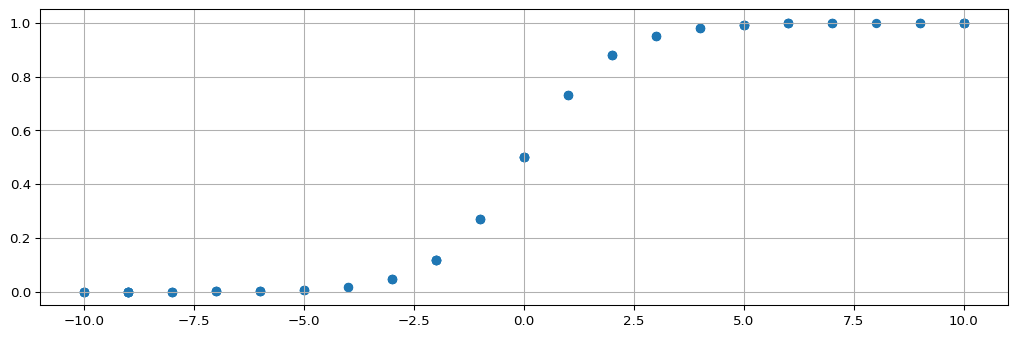

In [ ]:
plt.figure(figsize = (13, 4), dpi = 96)
plt.scatter(random,y_sig)
plt.grid(True)
plt.show()

As you can see, the arrangement of the points appears to form a shape of the English letter 'S'.

**Important Observations**

- *Observation 1:* If $x = 0$, then the output of the sigmoid function is $y = 0.5$ because

  $$y = \frac{1}{1 + e^{0}} = \frac{1}{1 + 1} = \frac{1}{2} = 0.5$$

  Similarly, if $x = -1$, then the output of the sigmoid function is $y < 0.5$ because

  $$y = \frac{1}{1 + e^{1}} = \frac{1}{1 + 2.71} = \frac{1}{3.71} < 0.5$$

  And, if $x = 1$, then the output of the sigmoid function is $y > 0.5$ because

  $$y = \frac{1}{1 + e^{-1}} = \frac{e}{e + 1} = \frac{2.71}{3.71} = 0.73 > 0.5$$

- *Observation 2:* From the curve, you can also see that as the values on the $x$-axis increase, the values on the $y$-axis also increase. So you can say that **the sigmoid curve is continuously increasing**.

Based on the above two observations, you can say that the input values to the sigmoid function should be both negative and positive. Hence, before building a univariate logistic regression model, first inspect the polarity (i.e. sign) of values of the independent variable. If all the values are non-negative, then use the standard scaler method to normalise values so that you get a few negative values as well in the independent variable.

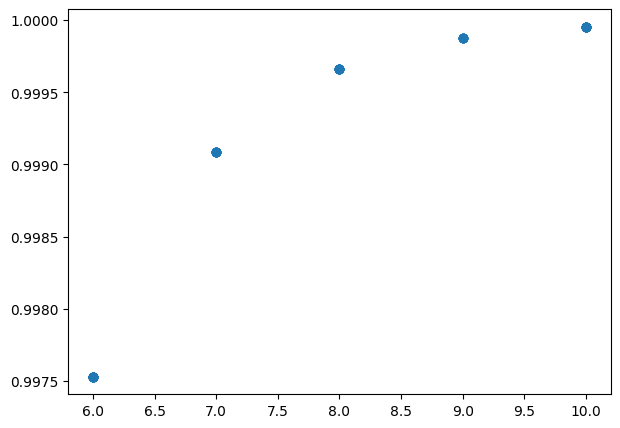

In [ ]:
r = np.random.randint(6,11,50)
r_y = sigmoid(r)
plt.figure(figsize =(7,5))
plt.scatter(r,r_y)
plt.show()

---

#### Activity 7: Classification Criteria in Logistic Regression

To classify an outcome as either **yes** or **no** (1 or 0), you need to randomly assign a probability value as the **threshold value**. Let's say the threshold probability value is $0.5$. If for any input value, the corresponding sigmoid function output is
- less than 0.5, then you can label that outcome as 0 or **no**
- else, you can label that outcome as 1 or **yes**.

Let's create a function called `predict()` in Python that takes the output of the `sigmoid()` function and returns a Pandas series containing 0s and 1s as the output.

In [ ]:
sigmoid(288)

,0
0,1.0


In [ ]:
def predict(sig,t):
    labels = [1 if i >= t else 0 for i in sig]
    return pd.Series(labels)

In [ ]:
# Create the 'predict()' function as described above.
def predict(sigmoid_output, threshold):
  y_pred = [1 if output >= threshold else 0 for output in sigmoid_output]
  return pd.Series(y_pred)

In the above code,

- we iterate through each item of the `sigmoid_output` series,

- compare each item with the threshold value,

- if the item is is greater than or equals to 0.5, we add `1` to a Python list, else add `0` to it,

- convert the Python list to a Pandas series using the `pd.Series()` function,

- return the Pandas series created

Now let's use the `predict()` function to classify the `sigmoid()` function outputs as 0 and 1.

In [ ]:
predictions = predict(y_sig,0.5)
predictions

,0
0,1
1,1
2,0
3,1
4,1
...,...
95,1
96,0
97,1
98,1


In [ ]:
#  Use the 'predict()' function to classify the 'sigmoid()' function outputs as 0 and 1.
threshold = 0.5
y_pred = predict(rand_int_array_output, threshold)
y_pred

,0
0,1
1,0
2,0
3,0
4,0
...,...
95,0
96,1
97,0
98,0


Let's create a scatter plot between the random integers and their corresponding binary labels (i.e. 0 and 1).

In [ ]:
plt.figure(figsize = (14, 4), dpi = 86)
plt.scatter(random, predictions)
plt.axhline(0.5,color="red",label=0.5)
plt.legend()
plt.show()

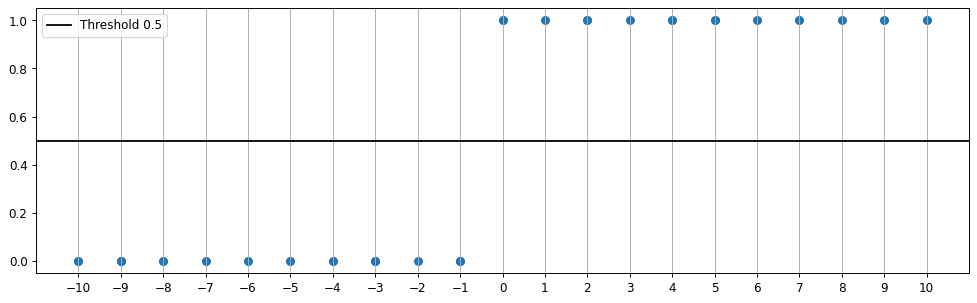

In [ ]:
#  Create a scatter plot between the random integers and their corresponding binary labels (i.e. 0 and 1).
plt.figure(figsize = (14, 4), dpi = 86)
plt.scatter(rand_int_array_input, y_pred)
plt.axhline(threshold, color= 'black' , label=f"Threshold {threshold}")
plt.xticks(np.arange(-10, 11))
plt.grid(axis = 'x')
plt.legend()
plt.show()

With different threshold values, you will get different classifications but the most optimal threshold value is that value which classifies most sigmoid function outputs correctly as 0 and 1.

Let's consider five different threshold probability values and classify the sigmoid function outputs as 0 and 1 based on them. Let's also create their scatter plots.

In [ ]:
thresholds = [0.1,0.3,0.5,0.7,0.9]
for i in range(len(thresholds)):
  plt.figure(figsize = (13, 3), dpi = 96)
  plt.title(f'Threshold value:{thresholds[i]}')
  plt.scatter(random,predict(y_sig,thresholds[i]))
  plt.axhline(thresholds[i],label=thresholds[i],color="red")
  plt.legend()
  plt.show()

In [ ]:
thresholds = np.linspace(0.1, 0.9,5)
thresholds

In [ ]:
# Consider 5 different threshold probability values and classify the sigmoid function outputs as 0 and 1 based on them.
# Also create their scatter plots.
thresholds = np.linspace(0.1, 0.9, 5)
predictions = [[t, list(predict(rand_int_array_output, t))] for t in thresholds]

for i in range(len(predictions)):
  plt.figure(figsize = (13, 3), dpi = 96)
  plt.scatter(rand_int_array_input, predictions[i][1])
  plt.axhline(y = predictions[i][0], label = f'y = {predictions[i][0]:.2f}', color = 'r')
  plt.xticks(np.arange(-10, 12))
  plt.grid(axis = 'x')
  plt.legend()
  plt.show()

Now let's apply the same logic to classify the heart disease patients as 0 and 1 based on their cholesterol levels. But before that let's check the range of values in the `chol` column.

Cholesterol Descriptive Statistics:
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64



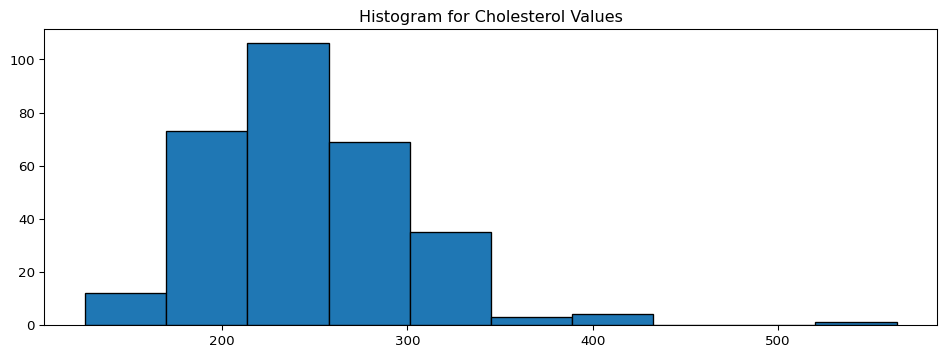

In [ ]:
# Get the descriptive statistics for the 'chol' column.
print(f"Cholesterol Descriptive Statistics:\n{df['chol'].describe()}\n")

plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for Cholesterol Values")
plt.hist(df['chol'], bins = 'sturges', edgecolor = 'black')
plt.show()

As you can see, all the values in the cholesterol column are non-negative. Let's first normalise them by calculating their $Z$-scores (or standard scaler).

Descriptive statistics for the normalised cholesterol values:
count    3.030000e+02
mean    -1.113887e-16
std      1.000000e+00
min     -2.320322e+00
25%     -6.803688e-01
50%     -1.208554e-01
75%      5.447726e-01
max      6.130260e+00
Name: chol, dtype: float64



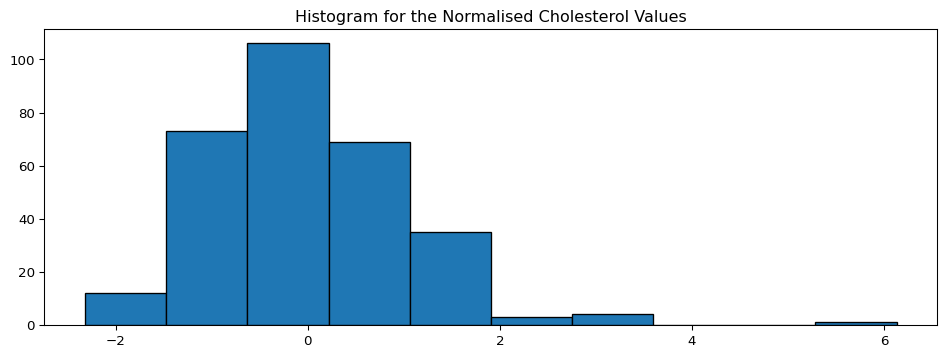

In [ ]:
#  Normalise the 'chol' column values using the standard scaler method.
def standard_scaler(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

chol_scaled = standard_scaler(df['chol'])
print(f"Descriptive statistics for the normalised cholesterol values:\n{chol_scaled.describe()}\n")

plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for the Normalised Cholesterol Values")
plt.hist(chol_scaled, bins = 'sturges', edgecolor = 'black')
plt.show()

In [ ]:
# Calculate the sigmoid output for both the scaled (or normalised) and non-scaled cholesterol values.
# Non-scaled cholesterol values.
chol_sigmoid_output = sigmoid(df['chol'])
print(f"Descriptive stats for sigmoid output of non-scaled cholesterol values:\n{chol_sigmoid_output.describe()}\n")

# Scaled cholesterol values.
chol_scaled_sigmoid_output = sigmoid(chol_scaled)
print(f"Descriptive stats for sigmoid output of scaled cholesterol values:\n{chol_scaled_sigmoid_output.describe()}")

Descriptive stats for sigmoid output of non-scaled cholesterol values:
count    303.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: chol, dtype: float64

Descriptive stats for sigmoid output of scaled cholesterol values:
count    303.000000
mean       0.492837
std        0.198175
min        0.089454
25%        0.336179
50%        0.469823
75%        0.632919
max        0.997829
Name: chol, dtype: float64


As you can see, all the probabilities (sigmoid outputs) for the non-scaled cholesterol values are 1 whereas they range between 0 and 1 for the scaled `chol` values.

Now for different thresholds between 0 and 1, let's classify whether a patient has heart disease or not based on the scaled cholesterol values.



In [ ]:
for i in range(len(thresholds)):
  plt.figure(figsize = (13, 3), dpi = 96)
  plt.title(f'Threshold value:{thresholds[i]}')
  plt.scatter(chol_scaled_sigmoid_output,predict(chol_scaled_sigmoid_output,thresholds[i]))
  plt.axhline(thresholds[i],label=thresholds[i],color="red")
  plt.legend()
  plt.show()

NameError: name 'thresholds' is not defined

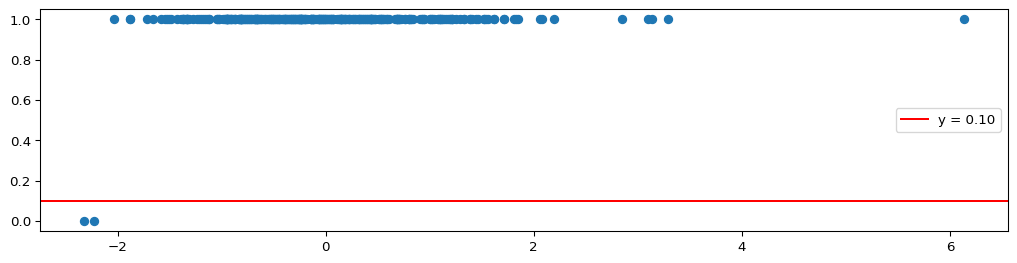

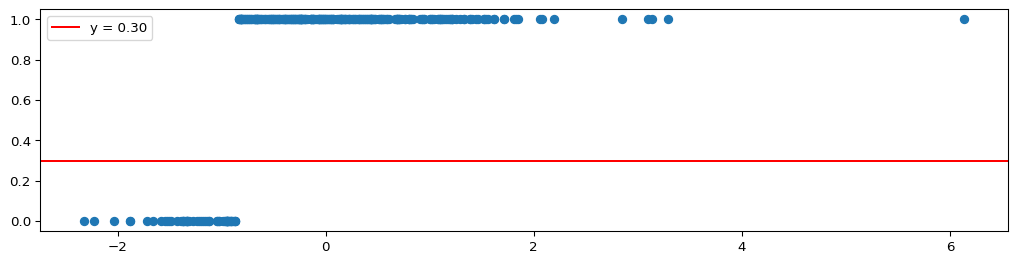

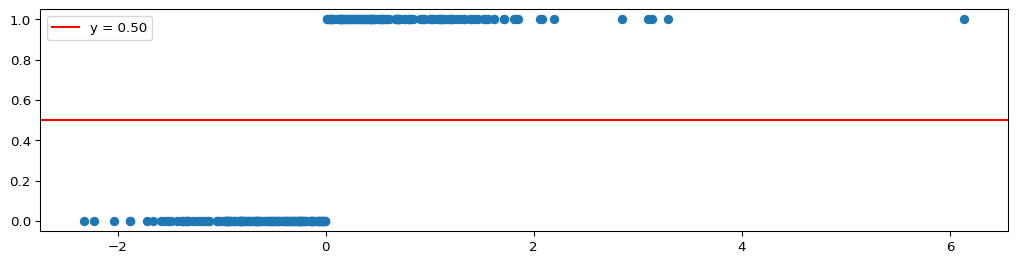

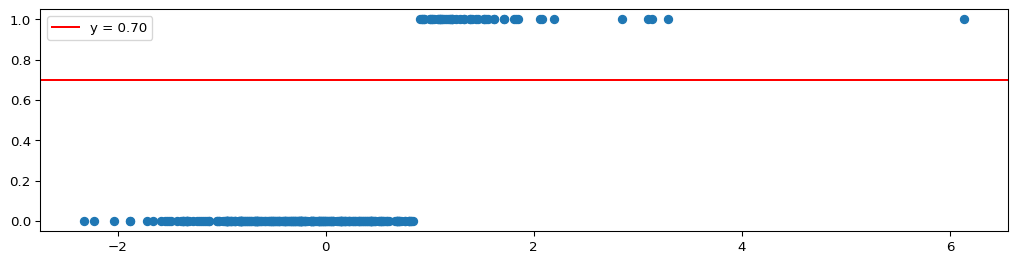

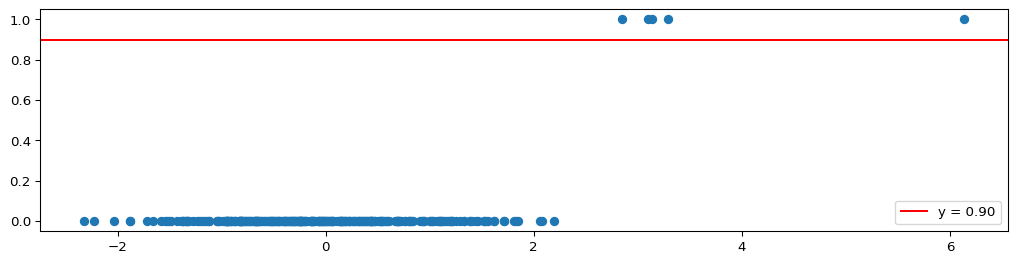

In [ ]:
#  Consider 5 different threshold probability values and classify the sigmoid function outputs as 0 and 1 based on them.
# Also create their scatter plots.
thresholds = np.linspace(0.1, 0.9, 5)
heart_disease_pred = [[t, predict(chol_scaled_sigmoid_output, t)] for t in thresholds]

for i in range(len(heart_disease_pred)):
  plt.figure(figsize = (13, 3), dpi = 96)
  plt.scatter(chol_scaled, heart_disease_pred[i][1])
  plt.axhline(y = heart_disease_pred[i][0], label = f'y = {heart_disease_pred[i][0]:.2f}', color = 'r')
  plt.legend()
  plt.show()

Now let's find out the number of 1s and 0s classified by the `predict()` function w.r.t. the threshold of 0.5.

In [ ]:
chol_pred = predict(chol_scaled_sigmoid_output,0.5)
print(chol_pred.value_counts(),"\n")
df["target"].value_counts()

0    167
1    136
Name: count, dtype: int64 



,count
target,
1,165
0,138


In [ ]:
# Find out the number of 1s and 0s classified by the 'predict()' function for a threshold of 0.5.
print("Threshold:", heart_disease_pred[2][0])
print(f"\nPrediction counts:\n{heart_disease_pred[2][1].value_counts()}")
print(f"\nActual target counts:\n{df['target'].value_counts()}")

Threshold: 0.5

Prediction counts:
0    167
1    136
Name: count, dtype: int64

Actual target counts:
target
1    165
0    138
Name: count, dtype: int64


As you can see the number of values classified as 0 and 1 is almost the same as the number of actual 0s and 1s in the dataset.

However, are the predicted 0s  correctly classified as 0s and the predicted 1s  correctly classified as 1s?

Let's find out by creating a confusion matrix.

In [ ]:
# Create a confusion matrix for the predicted values.
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['target'], heart_disease_pred[2][1]))

[[ 65  73]
 [102  63]]


There are a lot of false positives and false negatives in the predicted values. Let's print the f1-scores.

In [ ]:
 # Print the classification report for the predicted values.
from sklearn.metrics import classification_report

print(classification_report(df['target'], heart_disease_pred[2][1]))

              precision    recall  f1-score   support

           0       0.39      0.47      0.43       138
           1       0.46      0.38      0.42       165

    accuracy                           0.42       303
   macro avg       0.43      0.43      0.42       303
weighted avg       0.43      0.42      0.42       303



The f1-scores are also lower. Hence, clearly, the cholesterol values alone cannot  accurately predict whether a person has heart disease or not. You need to consider more features to build a logistic regression model for this purpose.

